In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('/content/numeric_2x2.csv')
X = dataset1[['Column1']].values
y = dataset1[['Column2']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:

class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu=nn.ReLU()
        self.history={'loss:':[]}

  def forward(self, x):

        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x=self.fc3(x)
        return x






In [ ]:
harish=NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(harish.parameters(),lr=0.001)

In [ ]:
def train_model(harish, X_train, y_train, criterion, optimizer, epochs=1000):
    # initialize history before loop
    harish.history = {'loss': []}

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = harish(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # record loss
        harish.history['loss'].append(loss.item())

        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [ ]:
train_model(harish, X_train_tensor, y_train_tensor, criterion,optimizer)

Epoch [0/1000], Loss: 74.268211
Epoch [200/1000], Loss: 42.204529
Epoch [400/1000], Loss: 14.685860
Epoch [600/1000], Loss: 5.777940
Epoch [800/1000], Loss: 4.847695


In [ ]:
with torch.no_grad():
    test_loss = criterion(harish(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 12.856814


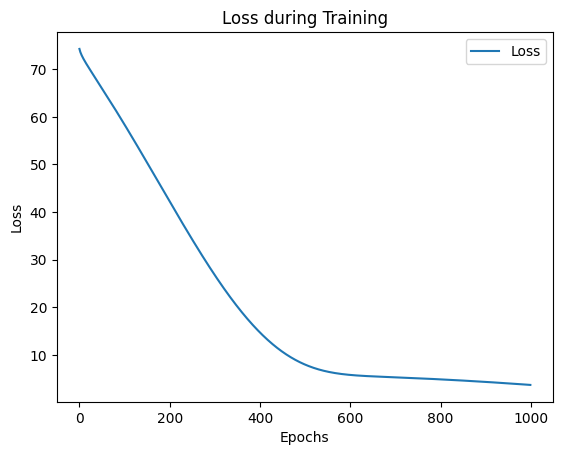

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the loss history
loss_df = pd.DataFrame(harish.history['loss'], columns=['Loss'])

# Plot the loss curve
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()


In [ ]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = harish(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 42.725154876708984
